<a href="https://colab.research.google.com/github/Adityainsight/Machine-Learning/blob/main/SLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub
paultimothymooney_chest_xray_pneumonia_path = kagglehub.dataset_download('paultimothymooney/chest-xray-pneumonia')

print('Data source import complete.')



Practical 7: SLP for Chest X-ray (Path: /kaggle/input/chest-xray-pneumonia/chest_xray/)
Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
SLP Model Summary:


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2025-10-10 18:57:19.414837: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │        16,385 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,385 (64.00 KB)

 Trainable params: 16,385 (64.00 KB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 88s 532ms/step - accuracy: 0.7566 - loss: 0.6178 - val_accuracy: 0.7596 - val_loss: 0.4584
Epoch 2/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 49s 303ms/step - accuracy: 0.9266 - loss: 0.1796 - val_accuracy: 0.7869 - val_loss: 0.4662
Epoch 3/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 50s 306ms/step - accuracy: 0.9440 - loss: 0.1493 - val_accuracy: 0.7131 - val_loss: 0.9095
Epoch 4/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 50s 308ms/step - accuracy: 0.9399 - loss: 0.1477 - val_accuracy: 0.7035 - val_loss: 1.0326
Epoch 5/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 50s 307ms/step - accuracy: 0.9500 - loss: 0.1358 - val_accuracy: 0.6843 - val_loss: 1.4587

SLP Test Accuracy: 0.6843
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 201ms/step

SLP Classification Report:
               precision    recall  f1-score   support

      NORMAL       0.97      0.16      0.28       234
   PNEUMONIA       0.66      1.00      0.80       390

    accuracy                           0.68       624
   macro avg       0.82      0.58  

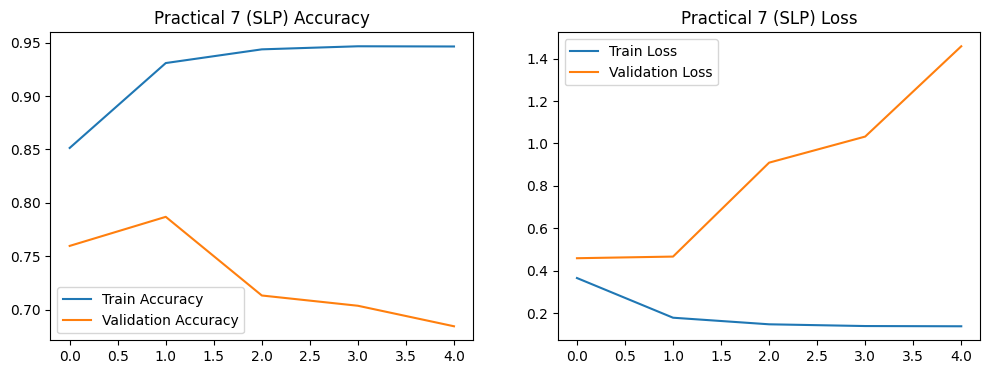

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

CHEST_XRAY_PATH = '/kaggle/input/chest-xray-pneumonia/chest_xray/'

def plot_history(history, title="SLP Training History"):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{title} Accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title} Loss')
    plt.legend()
    plt.show()

def run_practical_7(data_path, image_size=(128, 128), epochs=5):
    """Implements and trains the Single-Layer Perceptron (SLP)."""
    print("\n" + "="*80)
    print(f"Practical 7: SLP for Chest X-ray (Path: {data_path})")
    print("="*80)

    IMAGE_SIZE = image_size

    train_datagen = ImageDataGenerator(rescale=1./255)
    test_datagen = ImageDataGenerator(rescale=1./255)

    try:
        train_gen = train_datagen.flow_from_directory(
            data_path + 'train',
            target_size=IMAGE_SIZE,
            color_mode='grayscale',
            batch_size=32,
            class_mode='binary'
        )
        test_gen = test_datagen.flow_from_directory(
            data_path + 'test',
            target_size=IMAGE_SIZE,
            color_mode='grayscale',
            batch_size=32,
            class_mode='binary',
            shuffle=False
        )
    except FileNotFoundError:
        print(f"FATAL ERROR: Dataset not found at '{data_path}'. Please check the nested folder structure in Kaggle.")
        return

    model = Sequential([
        Flatten(input_shape=(image_size[0], image_size[1], 1)),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    print("SLP Model Summary:")
    model.summary()

    history = model.fit(train_gen, epochs=epochs, validation_data=test_gen, verbose=1)

    loss, accuracy = model.evaluate(test_gen, verbose=0)
    print(f"\nSLP Test Accuracy: {accuracy:.4f}")

    y_pred_probs = model.predict(test_gen)
    y_pred = np.where(y_pred_probs > 0.5, 1, 0)
    y_true = test_gen.classes

    print("\nSLP Classification Report:\n", classification_report(y_true, y_pred, target_names=['NORMAL', 'PNEUMONIA']))
    print("\nSLP Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    plot_history(history, "Practical 7 (SLP)")

run_practical_7(CHEST_XRAY_PATH)